In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="subprocess.run")

%run utility_functions.ipynb

In [2]:
df = pd.read_csv("data/FedCycleData.csv")
df.sample(5)

ClientID  CycleNumber  Group  CycleWithPeakorNot  ReproductiveCategory  \
1344  nfp8286            2      0                   0                     0   
1151  nfp8249            1      0                   1                     0   
119   nfp8031            9      0                   1                     0   
1221  nfp8264            2      0                   1                     0   
393   nfp8083            3      0                   1                     0   

      LengthofCycle MeanCycleLength EstimatedDayofOvulation  \
1344             29                                           
1151             30           29.38                      17   
119              26                                      13   
1221             29                                      15   
393              27                                      16   

     LengthofLutealPhase FirstDayofHigh  ... Method Prevmethod Methoddate  \
1344                                 12  ...                                
1151                  13              6  ...      8                         
119                   13                 ...                                
1221                  14             12  ...                                
393                   11             11  ...                                

     Whychart Nextpreg NextpregM Spousesame SpousesameM Timeattemptpreg  \
1344                                                                      
1151        3        5         5          1           1               0   
119                                                                       
1221                                                                      
393                                                                       

                   BMI  
1344                    
1151  24.6891259105099  
119                     
1221                    
393                     

[5 rows x 80 columns]

# Replace all the `" "` values with nan

In [3]:
df = df.replace(" ", np.nan)

In [4]:
# df.info()

## List of feature which has missing values not more than 60%

In [5]:
null_percentages = df.isnull().mean() * 100
selected_features = null_percentages[null_percentages <= 90].index.tolist()
selected_df = df[selected_features]
selected_df.shape

(1665, 26)

In [6]:
selected_df.isnull().mean()

ClientID                      0.000000
CycleNumber                   0.000000
Group                         0.000000
CycleWithPeakorNot            0.000000
ReproductiveCategory          0.000000
LengthofCycle                 0.000000
EstimatedDayofOvulation       0.090090
LengthofLutealPhase           0.090691
FirstDayofHigh                0.154955
TotalNumberofHighDays         0.007207
TotalHighPostPeak             0.001802
TotalNumberofPeakDays         0.009610
TotalDaysofFertility          0.018619
TotalFertilityFormula         0.001201
LengthofMenses                0.002402
MensesScoreDayOne             0.002402
MensesScoreDayTwo             0.002402
MensesScoreDayThree           0.015015
MensesScoreDayFour            0.052252
MensesScoreDayFive            0.260661
MensesScoreDaySix             0.637838
MensesScoreDaySeven           0.865465
TotalMensesScore              0.002402
NumberofDaysofIntercourse     0.000601
IntercourseInFertileWindow    0.000601
UnusualBleeding          

# Fill missing values

- `EstimatedDayofOvulation` --> average value
- `MensesScoreDayOne` to `UnusualBleeding` replace the missing values by 0

In [7]:
# Remove unnecessary column
selected_df = selected_df.drop("ClientID", axis=1)
selected_df = selected_df.drop("ReproductiveCategory", axis=1)

In [8]:
# Change the data type from object to float
selected_df = selected_df.astype("float")

In [9]:
# selected_df.columns

In [10]:
selected_df[['MensesScoreDayOne',  'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
       'MensesScoreDayFive', 'MensesScoreDaySix', 'MensesScoreDaySeven',
       'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding']]  = selected_df[['MensesScoreDayOne',  'MensesScoreDayTwo', 'MensesScoreDayThree', 'MensesScoreDayFour',
       'MensesScoreDayFive', 'MensesScoreDaySix', 'MensesScoreDaySeven',
       'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding']].fillna(0)


In [11]:
columns_to_fill_with_mean = ['EstimatedDayofOvulation', 'LengthofLutealPhase',
                             'FirstDayofHigh', 'TotalNumberofHighDays', 'TotalHighPostPeak',
                             'TotalNumberofPeakDays', 'TotalDaysofFertility',
                             'TotalFertilityFormula', 'LengthofMenses']

column_means = selected_df[columns_to_fill_with_mean].mean()

df_filled = selected_df.fillna(value=column_means)

In [12]:
# df_filled.isnull().mean()

# EDA

In [13]:
df_filled.columns

Index(['CycleNumber', 'Group', 'CycleWithPeakorNot', 'LengthofCycle',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix',
       'MensesScoreDaySeven', 'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding'],
      dtype='object')

## LengthofCycle Ranges
__>= 21 & <= 45__

In [14]:
df_filled["LengthofCycle"].mean(), df_filled["LengthofCycle"].min(), df_filled["LengthofCycle"].max()

(29.2990990990991, 18.0, 54.0)

In [15]:
df_filled.shape

(1665, 24)

In [16]:
df_filled = df_filled[(df_filled["LengthofCycle"] >= 21) & (df_filled["LengthofCycle"] <= 45)]
df_filled.shape

(1656, 24)

## EstimatedDayofOvulation
__Based on box plot the range is 8 - 24. Box plot before removing the outlier. Then mention we used this measure for selecting the range for this feature__

In [17]:
df_filled["EstimatedDayofOvulation"].mean(), df_filled["EstimatedDayofOvulation"].min(), df_filled["EstimatedDayofOvulation"].max()

(15.968381801948311, 6.0, 29.0)

In [18]:
df_filled = df_filled[(df_filled["EstimatedDayofOvulation"] >= 8) & (df_filled["EstimatedDayofOvulation"] <= 24)]

In [19]:
df_filled.shape

(1612, 24)

<Axes: xlabel='EstimatedDayofOvulation'>

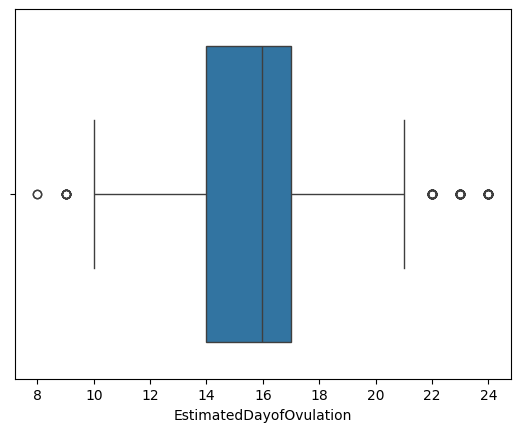

In [20]:
sns.boxplot(x='EstimatedDayofOvulation', data=df_filled)

## LengthofLutealPhase

In [21]:
df_filled["LengthofLutealPhase"].mean(), df_filled["LengthofLutealPhase"].min(), df_filled["LengthofLutealPhase"].max()

(13.27638811948694, 1.0, 34.0)

In [22]:
df_filled = df_filled[(df_filled["LengthofLutealPhase"] >= 9) & (df_filled["LengthofLutealPhase"] <= 18)]

In [23]:
df_filled.shape

(1547, 24)

<Axes: xlabel='LengthofLutealPhase'>

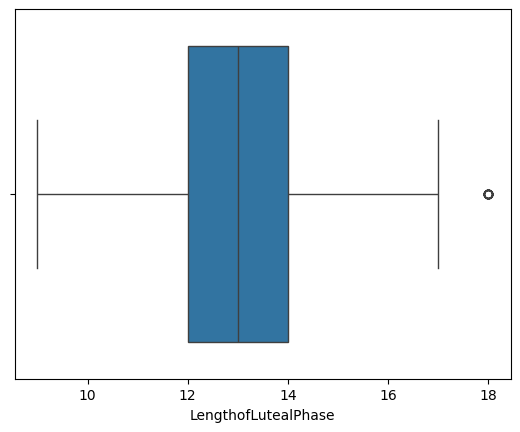

In [24]:
sns.boxplot(x='LengthofLutealPhase', data=df_filled)

## Coorelation
Not very high coorelation. Took all the features

<Axes: >

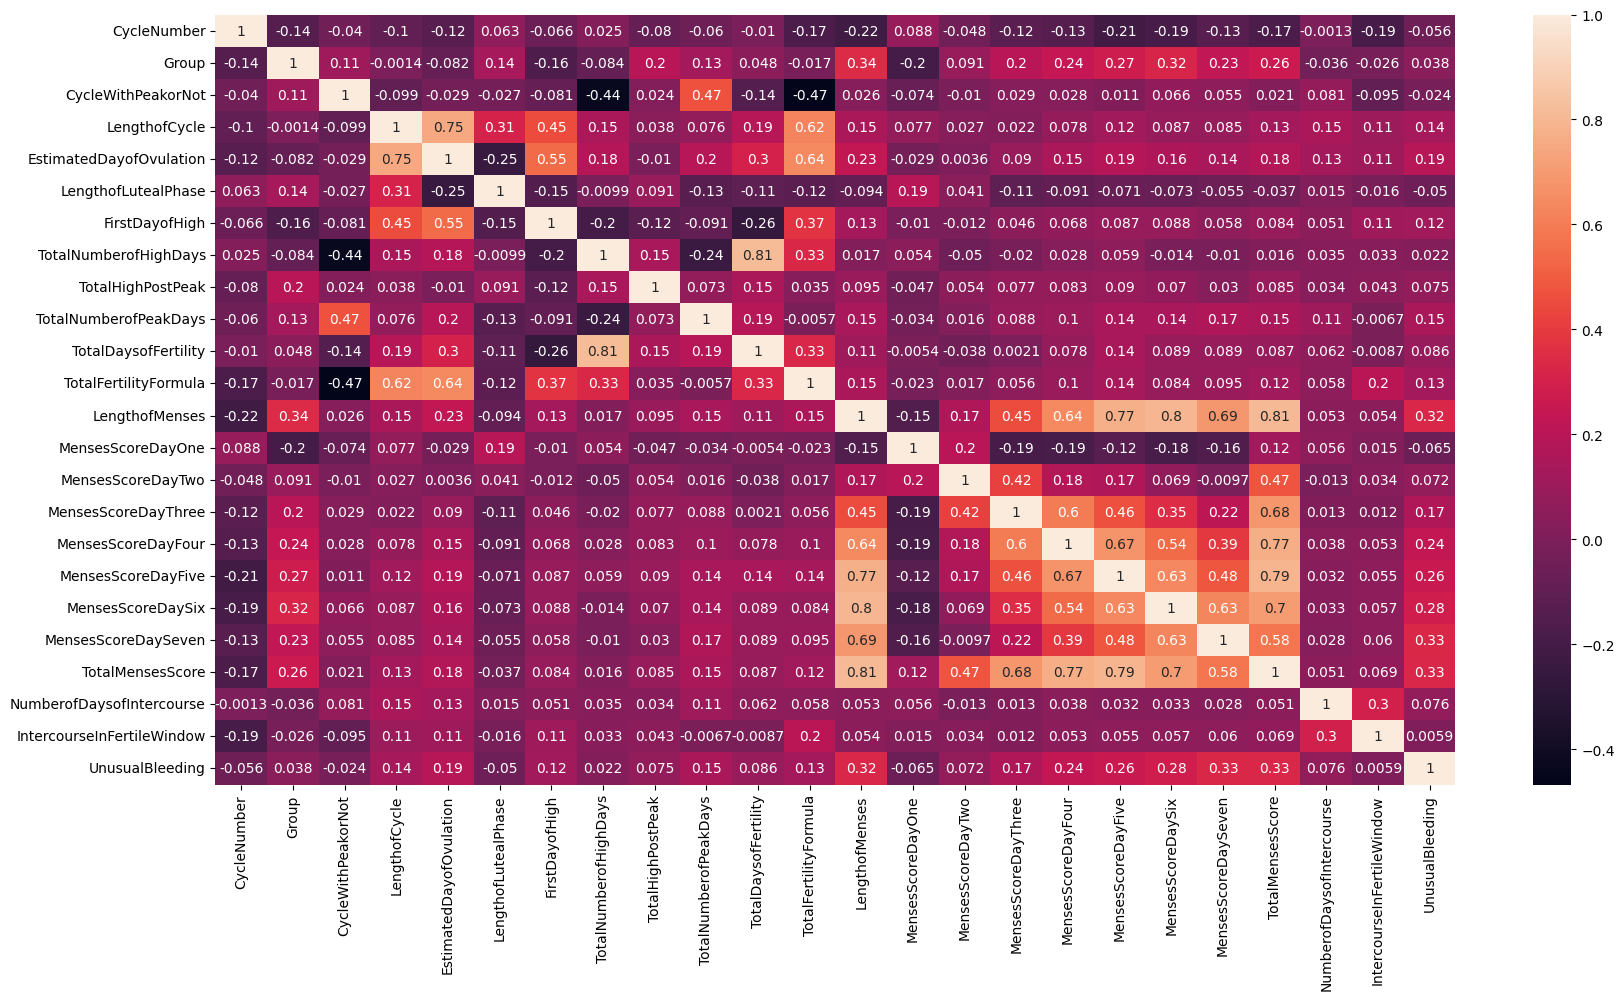

In [25]:
corr = df_filled.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, fmt='.2g', annot=True)

## Creating the class


In [26]:
df_filled['Healthy'] = (df_filled['LengthofCycle'] >= 23) & (df_filled['LengthofCycle'] <= 35)
df_filled['Healthy'] = df_filled['Healthy'].replace({True: 1, False: 0})

## Save the original preprocessed data

In [27]:
df_filled.to_csv("Original_Preprocessed_data.csv", index=None)

In [28]:
df_filled.Healthy.value_counts(normalize=True)

Healthy
1    0.95669
0    0.04331
Name: proportion, dtype: float64

In [29]:
df_filled.head()

CycleNumber  Group  CycleWithPeakorNot  LengthofCycle  \
0          1.0    0.0                 1.0           29.0   
1          2.0    0.0                 1.0           27.0   
2          3.0    0.0                 1.0           29.0   
3          4.0    0.0                 1.0           27.0   
4          5.0    0.0                 1.0           28.0   

   EstimatedDayofOvulation  LengthofLutealPhase  FirstDayofHigh  \
0                     17.0                 12.0       12.000000   
1                     15.0                 12.0       13.000000   
2                     15.0                 14.0       11.761905   
3                     15.0                 12.0       13.000000   
4                     16.0                 12.0       12.000000   

   TotalNumberofHighDays  TotalHighPostPeak  TotalNumberofPeakDays  ...  \
0                    5.0                0.0                    2.0  ...   
1                    2.0                0.0                    2.0  ...   
2                    1.0                0.0                    2.0  ...   
3                    2.0                0.0                    2.0  ...   
4                    4.0                0.0                    2.0  ...   

   MensesScoreDayThree  MensesScoreDayFour  MensesScoreDayFive  \
0                  2.0                 1.0                 1.0   
1                  2.0                 1.0                 1.0   
2                  2.0                 1.0                 1.0   
3                  3.0                 2.0                 1.0   
4                  2.0                 2.0                 1.0   

   MensesScoreDaySix  MensesScoreDaySeven  TotalMensesScore  \
0                0.0                  0.0              10.0   
1                0.0                  0.0              10.0   
2                0.0                  0.0              10.0   
3                0.0                  0.0              12.0   
4                0.0                  0.0              11.0   

   NumberofDaysofIntercourse  IntercourseInFertileWindow  UnusualBleeding  \
0                        5.0                         1.0              0.0   
1                        6.0                         1.0              0.0   
2                        5.0                         1.0              0.0   
3                        3.0                         0.0              0.0   
4                        5.0                         1.0              0.0   

   Healthy  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 25 columns]

In [30]:
# df_filled.columns

In [31]:
# pd.set_option('display.max_columns', None)
# df_filled

## Class imbalance

In [32]:
import ctgan
from ctgan import TVAE

ct = TVAE()

In [33]:
# dir(CTGAN)

In [ ]:
# df_filled.columns

In [35]:
# Train the model
ct.fit(df_filled, discrete_columns=('CycleNumber', 'Group', 'CycleWithPeakorNot', 'LengthofCycle',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'MensesScoreDaySix',
       'MensesScoreDaySeven', 'TotalMensesScore', 'NumberofDaysofIntercourse',
       'IntercourseInFertileWindow', 'UnusualBleeding', 'Healthy'))

In [36]:
# Once trained generate samples
samples = ct.sample(10000)

In [37]:
samples.shape

(10000, 25)

In [38]:
samples = samples[samples['Healthy'] == 0]
print(samples.shape)

(184, 25)


## Save the synthetic dataset

In [39]:
samples.to_csv("Synthetic.csv", index=None)

In [40]:
# ctgan_result_df = pd.concat([df_filled,samples])
# ctgan_result_df.head()

In [41]:
# ctgan_result_df.to_csv("Balanced_dataset.csv", index=None)

In [42]:
# ctgan_result_df.Healthy.value_counts(normalize=True)

In [43]:
sdf

NameError: name 'sdf' is not defined

# Classification

In [ ]:
df_filled = ctgan_result_df.copy()

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_filled.drop('Healthy', axis=1)
y = df_filled['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# __Logistic Regression__

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, classification_report

rf_classifier = LogisticRegression(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
evaluate_classifier(y_test, y_pred) 

In [ ]:
y_pred_prob = rf_classifier.predict(X_test)
plot_roc_curve(y_test, y_pred_prob)

In [ ]:
plot_learning_curve(rf_classifier, "Learning Curve", X_train, y_train, cv=5)

# __TabNet__

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

clf_tabnet = TabNetClassifier()
clf_tabnet.fit(
  X_train, y_train,
  eval_set=[(X_test, y_test)],
  eval_metric=['auc']
)

In [ ]:
y_pred = clf_tabnet.predict(X_test)

In [ ]:
evaluate_classifier(y_test, y_pred) 

In [ ]:
plot_roc_curve(y_test, y_pred)

## XGBoost

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'binary:logistic',  # Specify binary classification
    'eta': 0.3,  # Learning rate
    'max_depth': 3,  # Maximum depth of a tree
    'eval_metric': 'error'  # Evaluation metric to be used
}

# Train the model
num_rounds = 10
model = xgb.train(params, dtrain, num_rounds)

In [ ]:
preds = model.predict(dtest)

In [ ]:
predicted_labels = np.array(preds) > 0.5
predicted_labels = predicted_labels.astype(int)

In [ ]:
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))